In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
california_dataset = fetch_california_housing()

In [3]:
type(california_dataset)

sklearn.utils._bunch.Bunch

In [4]:
dir(california_dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [5]:
print(california_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
print(california_dataset.data.shape)

(20640, 8)


In [7]:
type(california_dataset.data)

numpy.ndarray

In [8]:
california_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [9]:
#actual prices in thousands ($)
california_dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# data exploration with pandas

In [10]:
import pandas as pd
from pandas import DataFrame

In [11]:
df = pd.DataFrame(data = california_dataset.data, columns = california_dataset.feature_names)

In [12]:
df['price'] = california_dataset.target

In [13]:
type(df['price'])

pandas.core.series.Series

In [14]:
df.head(4)  #top rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413


In [15]:
df.tail(4) #bottom rows

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [16]:
df.count() #show us the number of rows of each column

MedInc        20640
HouseAge      20640
AveRooms      20640
AveBedrms     20640
Population    20640
AveOccup      20640
Latitude      20640
Longitude     20640
price         20640
dtype: int64

# Cleaning data (check for missing values)

In [17]:
pd.isnull(df).any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
price         False
dtype: bool

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Visualising Data - Histograms, Distributions and Bar Charts

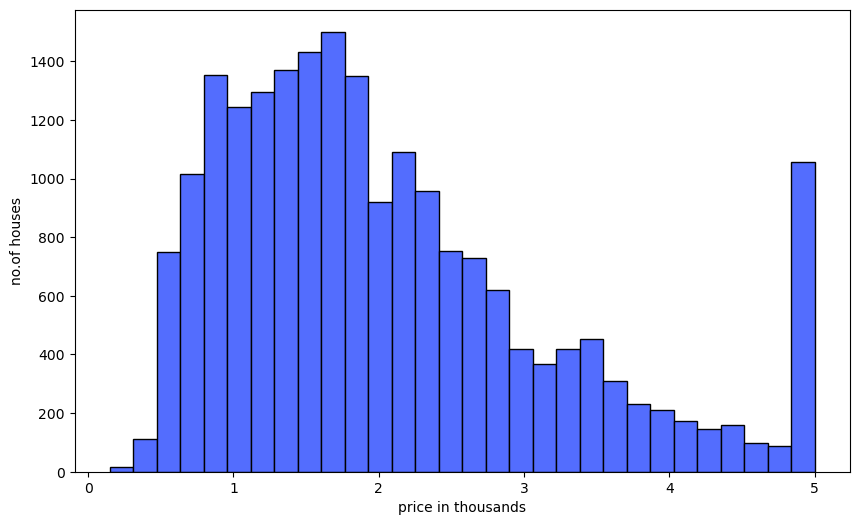

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins =30, ec = 'black', color = '#536DFE')
plt.xlabel('price in thousands')
plt.ylabel('no.of houses')
plt.show()

/var/folders/tr/96x2fhf966z17tmtzx0bls5h0000gn/T/ipykernel_3020/4067708713.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins = 30, hist = True, kde = False, color = '#536DFE')


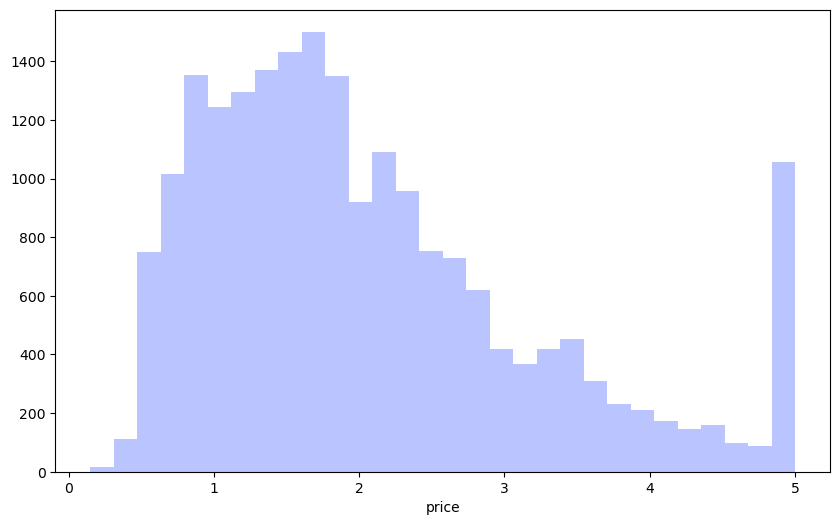

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'], bins = 30, hist = True, kde = False, color = '#536DFE')
plt.show()

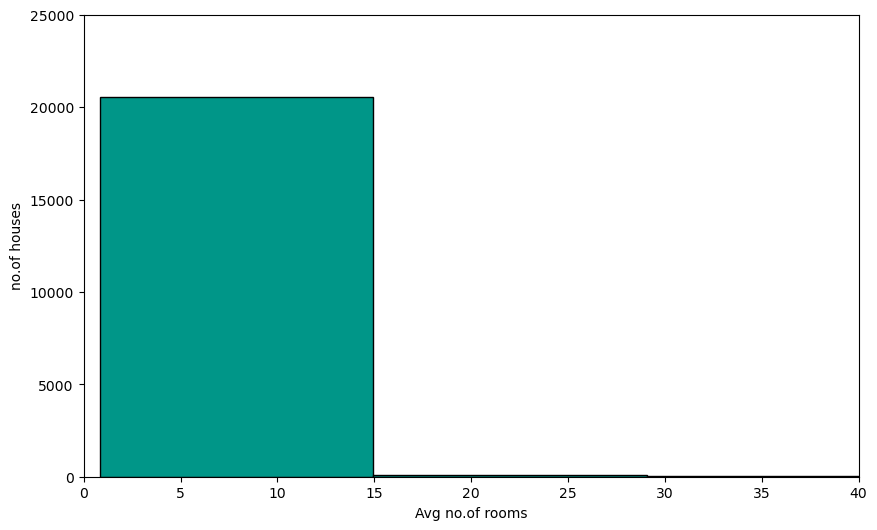

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df['AveRooms'], ec = 'black', color = '#009688')
plt.xlabel('Avg no.of rooms')
plt.ylabel('no.of houses')
plt.xlim(0,40)
plt.ylim(0,25000)
plt.show()

In [22]:
df['AveRooms'].mean()

5.428999742190376

In [23]:
df['AveRooms'].value_counts()

5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: AveRooms, Length: 19392, dtype: int64

# Descriptive Statistics

In [24]:
df['price'].mean()

2.068558169089147

In [25]:
df['price'].min()

0.14999

In [26]:
df['price'].max()

5.00001

In [27]:
df['price'].median()

1.797

In [28]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [29]:
df['price'].corr(df['AveRooms']) #positive correlation

0.15194828974145777

In [30]:
df['price'].corr(df['Population']) #negative correlation

-0.024649678888894893

In [31]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [32]:
mask = np.zeros_like(df.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [33]:
triangle_indices = np.triu_indices_from(mask)
triangle_indices

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7,
        8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 1, 2, 3, 4, 5, 6, 7, 8, 2, 3, 4, 5, 6,
        7, 8, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 5, 6, 7, 8, 6, 7, 8, 7, 8,
        8]))

In [34]:
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

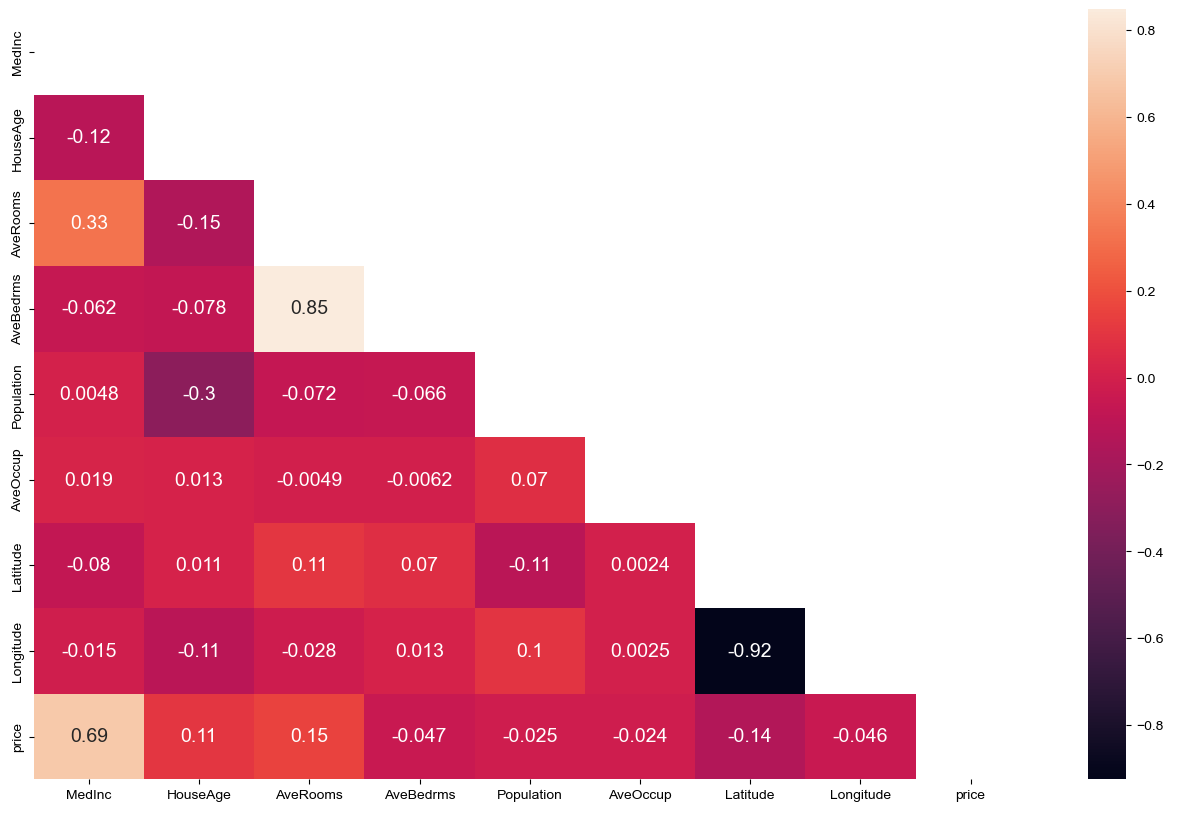

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask=mask, annot = True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks()
plt.yticks()
plt.show()

<Figure size 900x600 with 0 Axes>

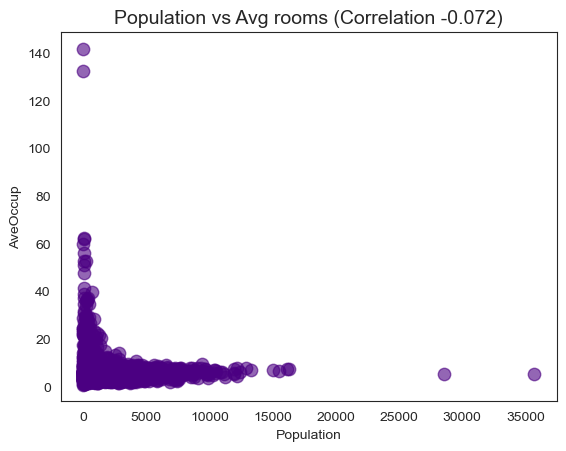

<Figure size 900x600 with 0 Axes>

In [36]:
pop_avgrooms_corr = round(df['Population'].corr(df['AveRooms']),3)
plt.scatter(x = df['Population'], y= df['AveRooms'] , alpha = 0.6, s = 80, color = 'indigo')
plt.title(f'Population vs Avg rooms (Correlation {pop_avgrooms_corr})', fontsize = 14)
plt.xlabel('Population')
plt.ylabel('AveOccup')
plt.figure(figsize = (9,6))

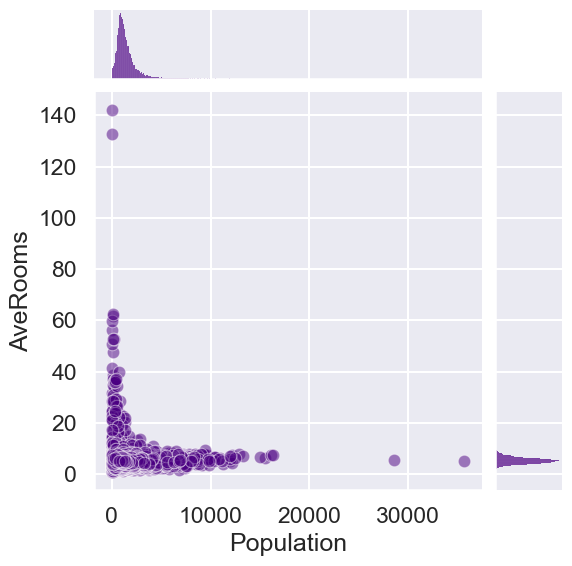

In [37]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=df['Population'], y=df['AveRooms'], color = 'indigo', joint_kws={'alpha':0.5})

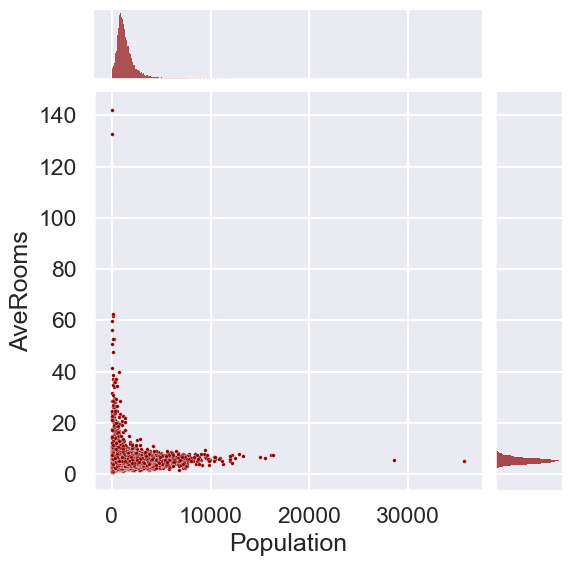

In [38]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=df['Population'], y=df['AveRooms'], s=7,color = 'darkred')

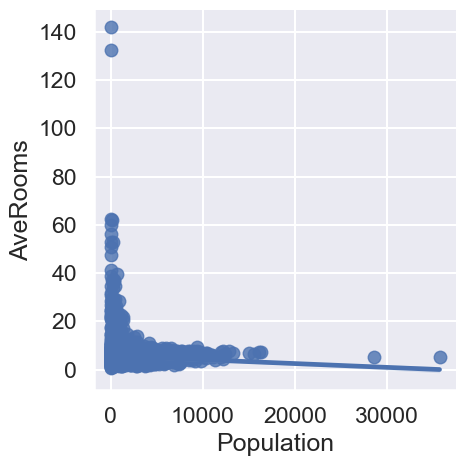

In [39]:
sns.lmplot(x ='Population', y = 'AveRooms', data=df)
plt.show()

<Figure size 900x600 with 0 Axes>

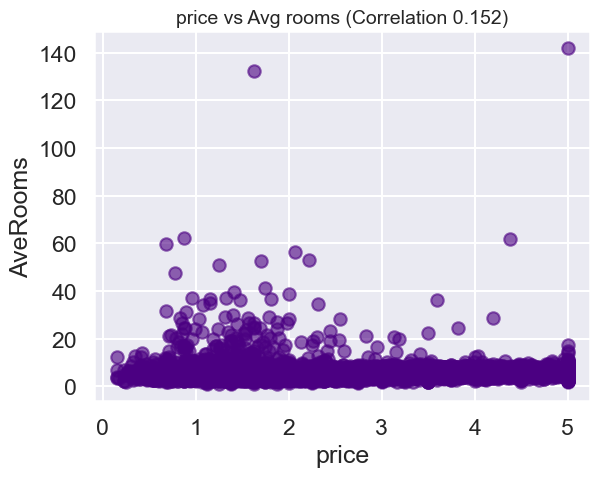

<Figure size 900x600 with 0 Axes>

In [40]:
price_avgrooms_corr = round(df['price'].corr(df['AveRooms']),3)
plt.scatter(x = df['price'], y= df['AveRooms'] , alpha = 0.6, s = 80, color = 'indigo')
plt.title(f'price vs Avg rooms (Correlation {price_avgrooms_corr})', fontsize = 14)
plt.xlabel('price')
plt.ylabel('AveRooms')
plt.figure(figsize = (9,6))

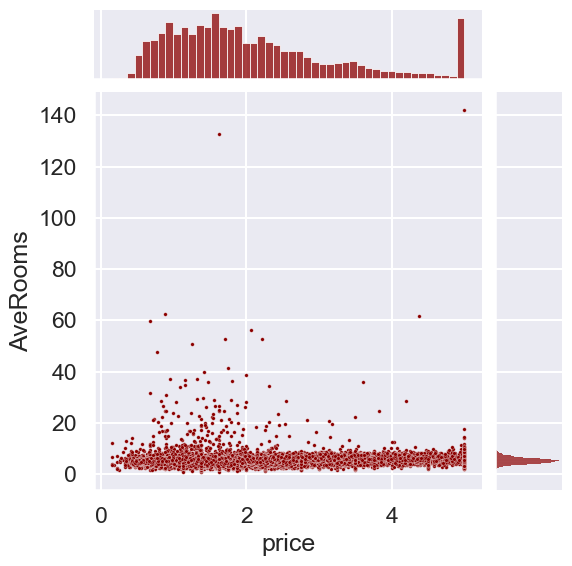

In [41]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')
sns.jointplot(x=df['price'], y=df['AveRooms'], s=7,color = 'darkred')

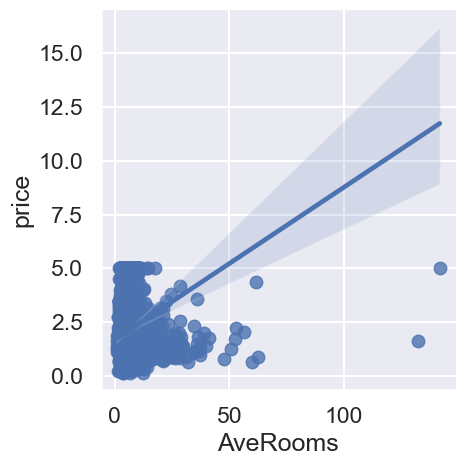

In [42]:
sns.lmplot(x ='AveRooms', y = 'price', data=df)
plt.show()

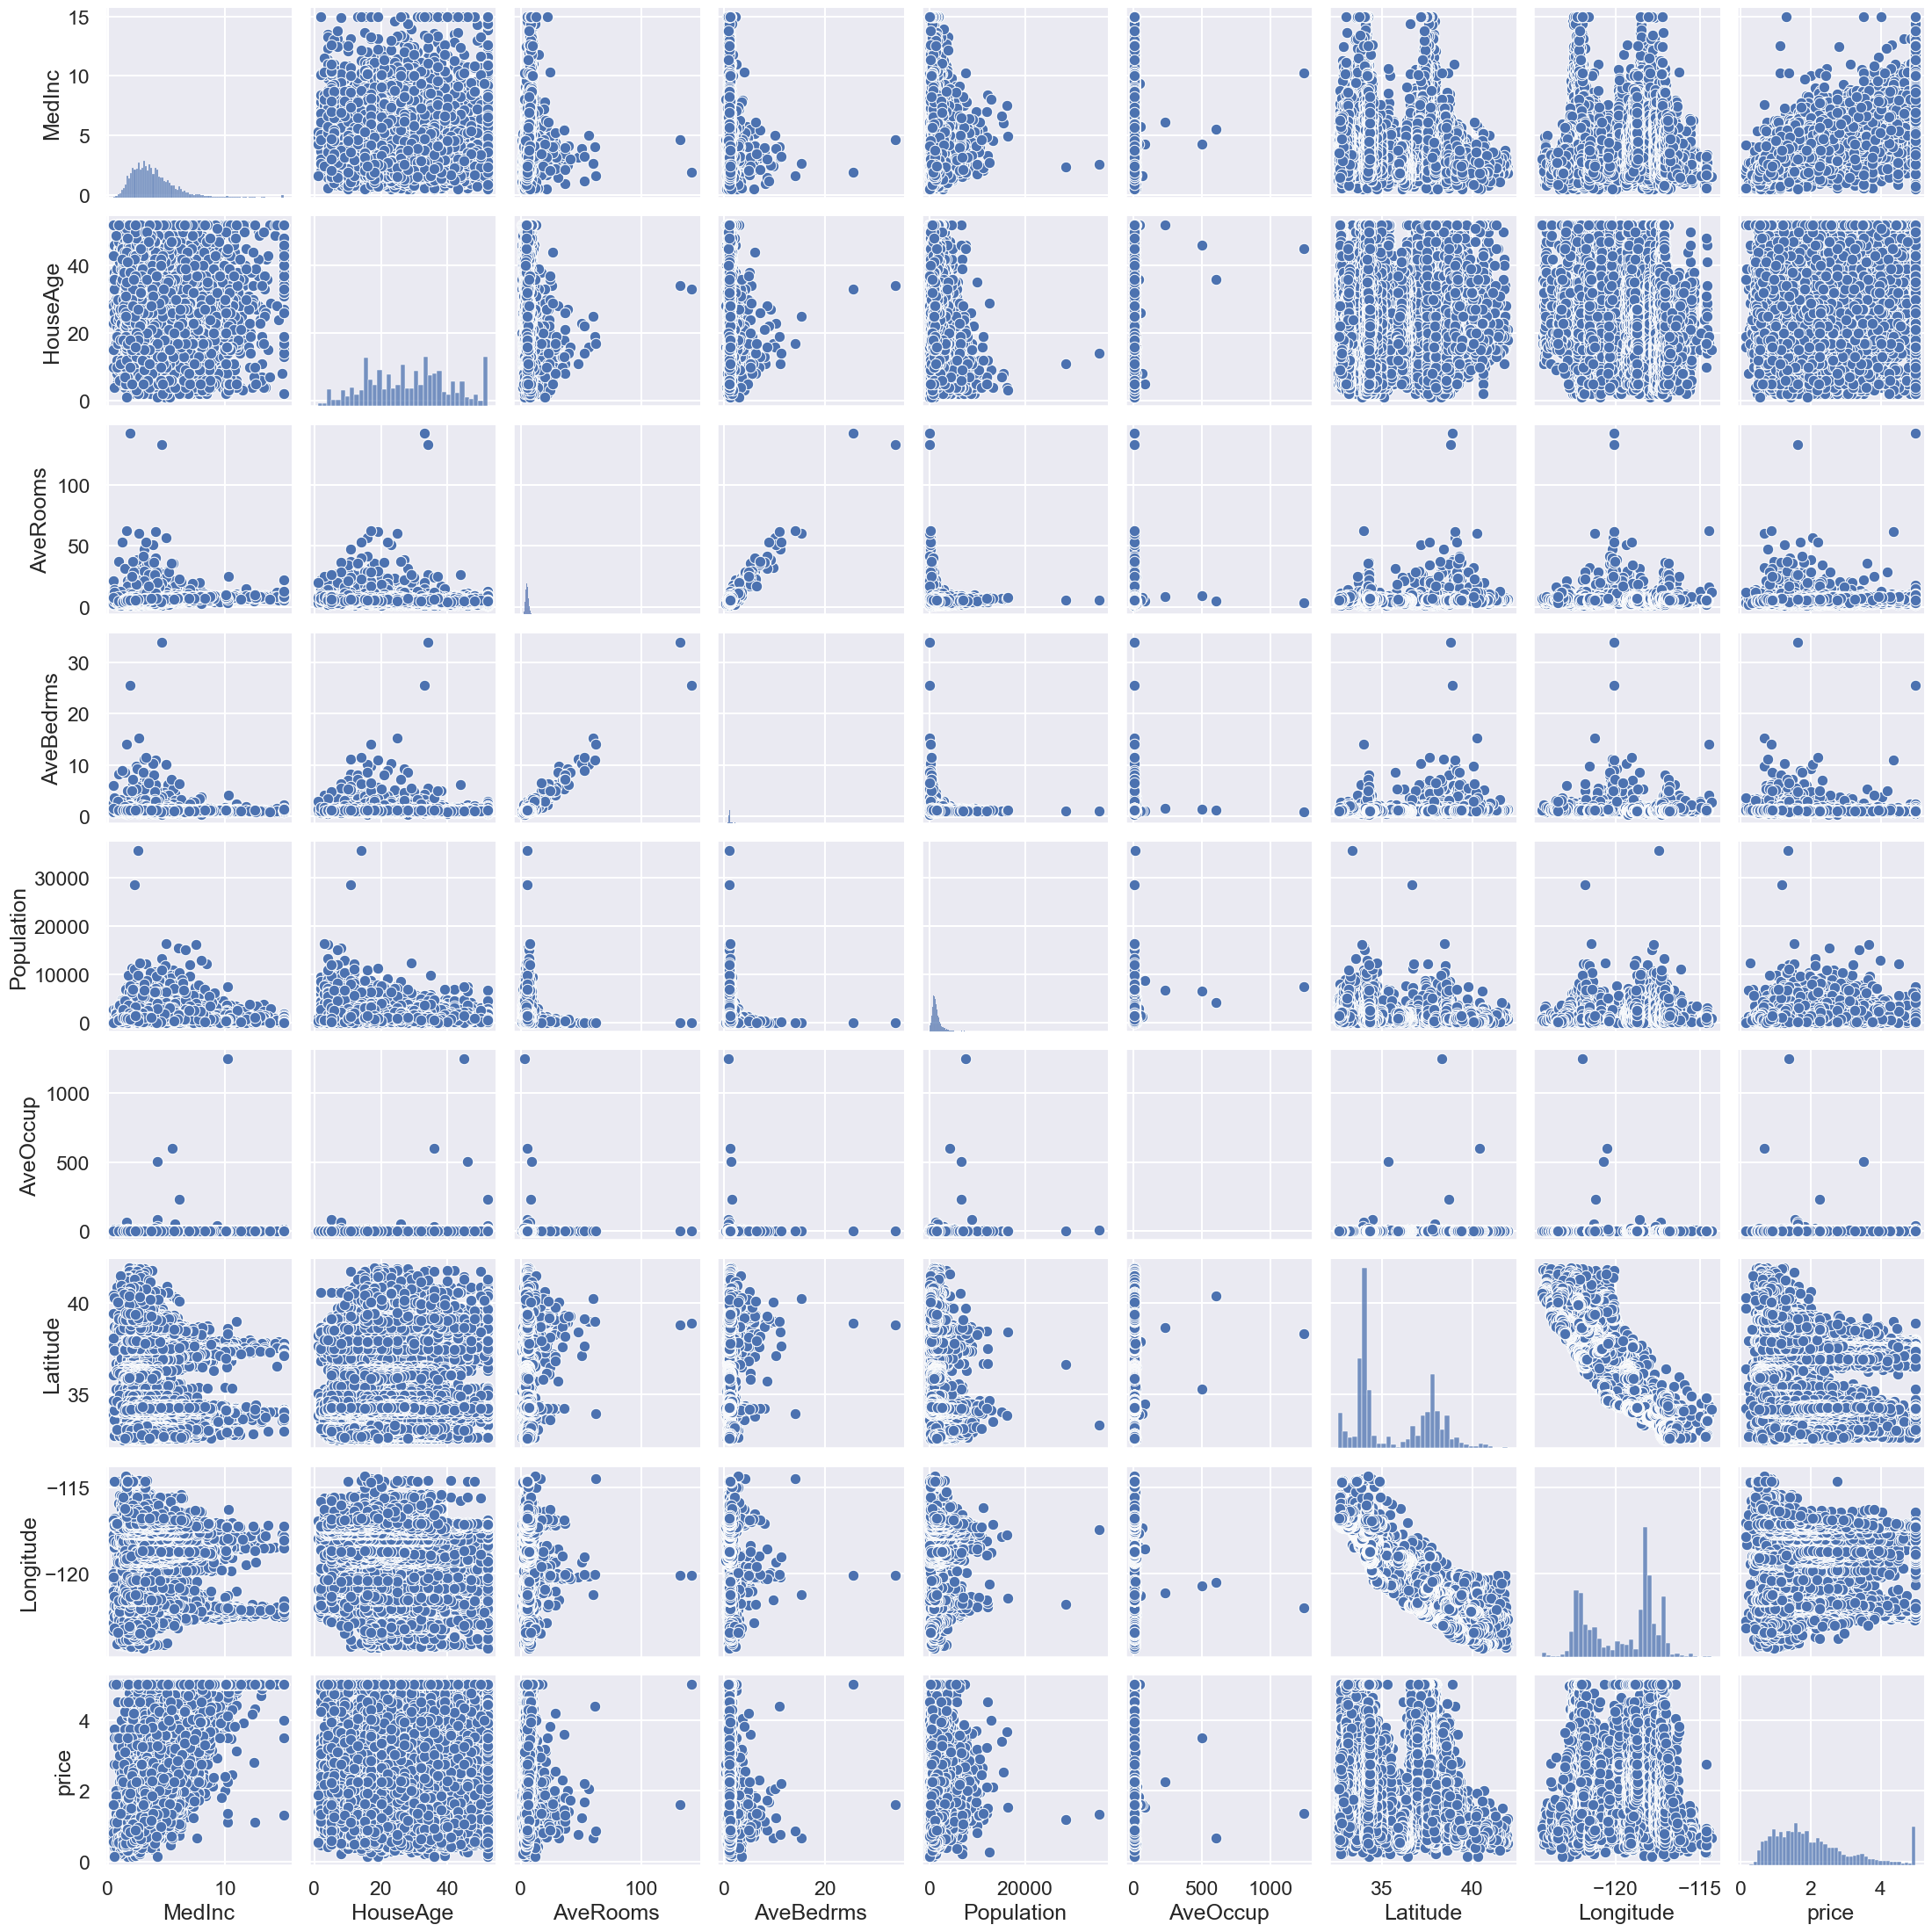

CPU times: user 30.4 s, sys: 364 ms, total: 30.8 s
Wall time: 29.8 s


In [43]:
%%time
sns.pairplot(df)
plt.show()

# Training and Test Dataset split

In [44]:
prices = df['price']
features = df.drop('price', axis = 1)
x_train,x_test,y_train,y_test = train_test_split(features, prices, test_size=0.2, random_state= 10 )

# %training set
len(x_train)/len(features)

0.8

In [45]:
# percent of test dataset
len(x_test)/len(features)

0.2

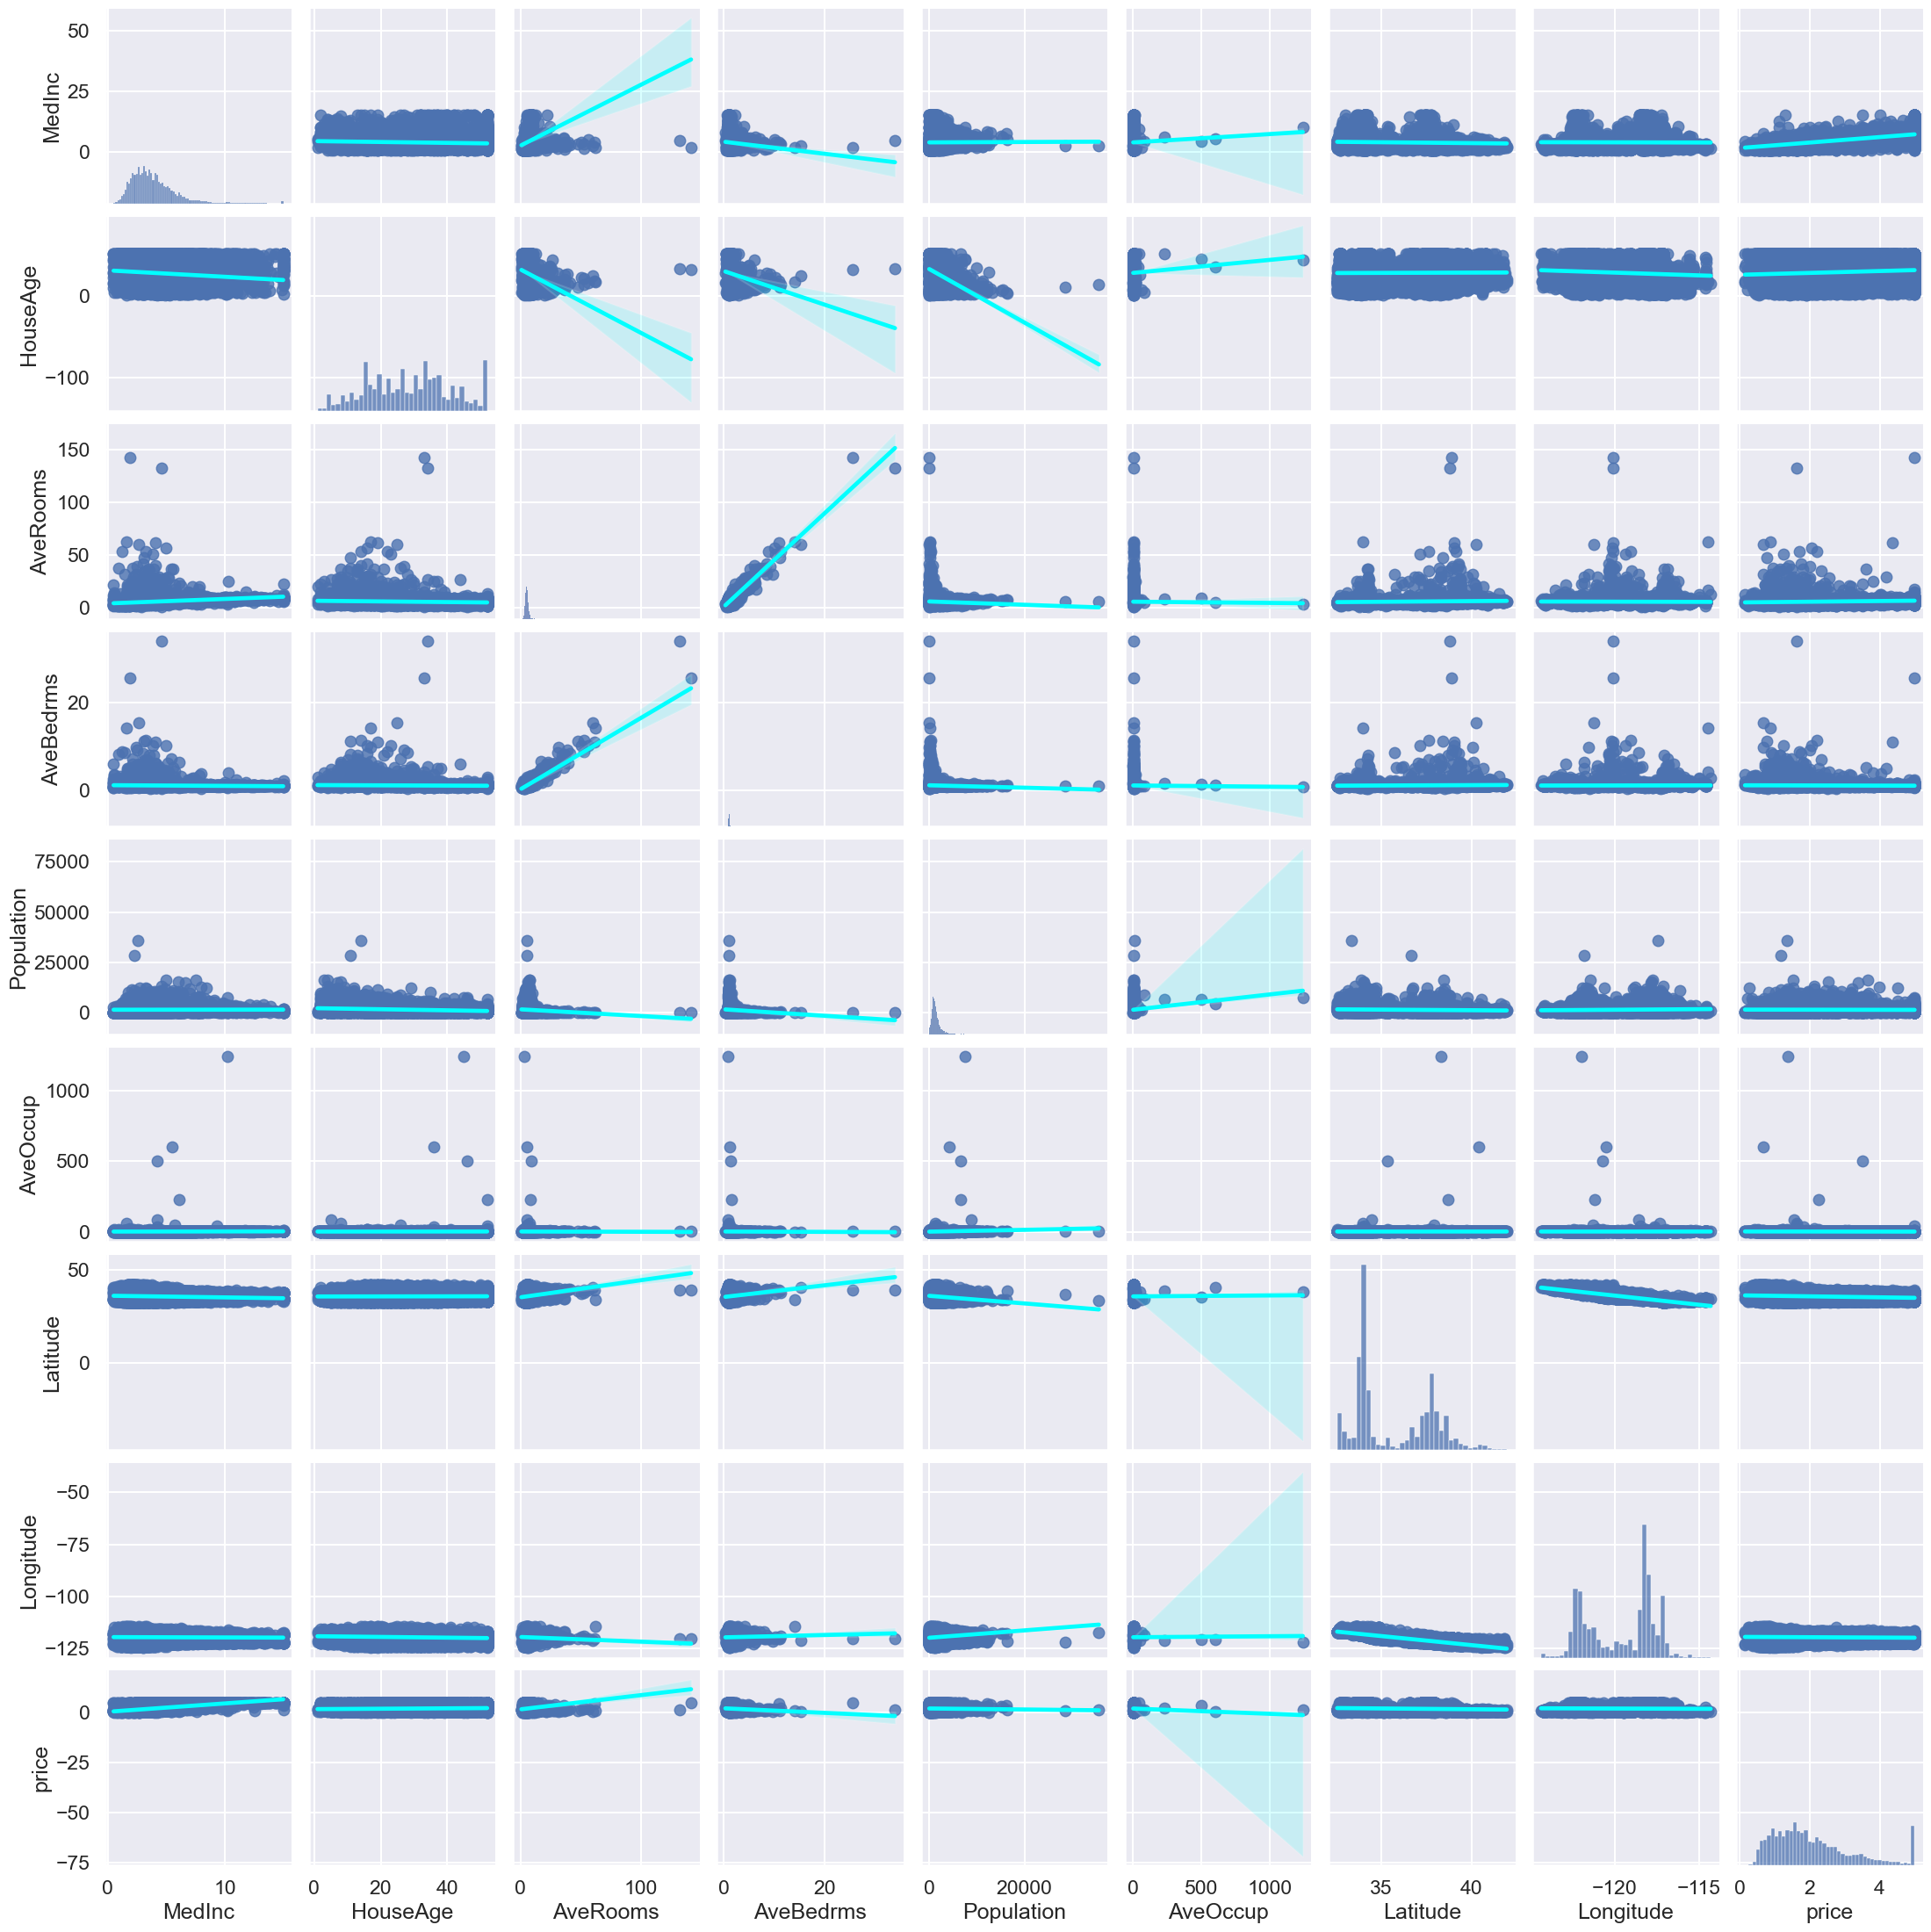

In [46]:
sns.pairplot(df, kind = 'reg', plot_kws = {'line_kws':{'color': 'cyan'}})
plt.show()

# MultiVariable Regression

In [47]:
model = LinearRegression()
model.fit(x_train,y_train)
print('Intercept', model.intercept_)
pd.DataFrame(data = model.coef_, index = x_train.columns, columns = ['coef'])

print('Training_R-squared', model.score(x_train, y_train))
print('Testing_R-Squared', model.score(x_test, y_test))

Intercept -37.48696576537279
Training_R-squared 0.6074049305021048
Testing_R-Squared 0.6009790143129112


# Data Transformations

In [48]:
df['price'].skew()

0.9777632739098345

In [49]:
np.log(df['price'])

0        1.509839
1        1.276758
2        1.258745
3        1.227592
4        1.230225
           ...   
20635   -0.247180
20636   -0.260067
20637   -0.080126
20638   -0.166055
20639   -0.112050
Name: price, Length: 20640, dtype: float64

In [50]:
y_log = np.log(df['price'])
y_log

0        1.509839
1        1.276758
2        1.258745
3        1.227592
4        1.230225
           ...   
20635   -0.247180
20636   -0.260067
20637   -0.080126
20638   -0.166055
20639   -0.112050
Name: price, Length: 20640, dtype: float64

In [51]:
y_log.skew()

-0.17317539032496646

/var/folders/tr/96x2fhf966z17tmtzx0bls5h0000gn/T/ipykernel_3020/1374005215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)


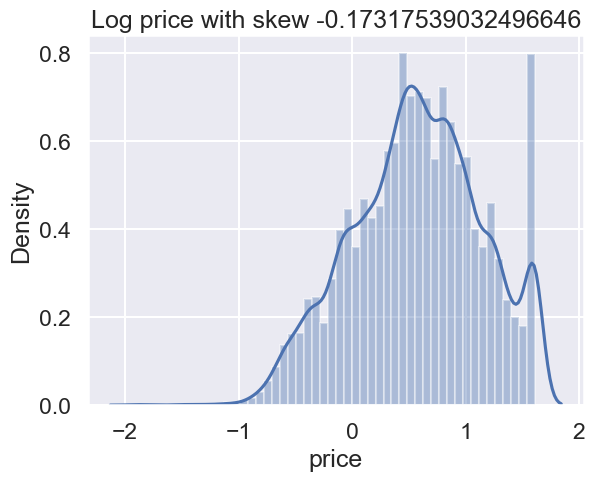

In [52]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

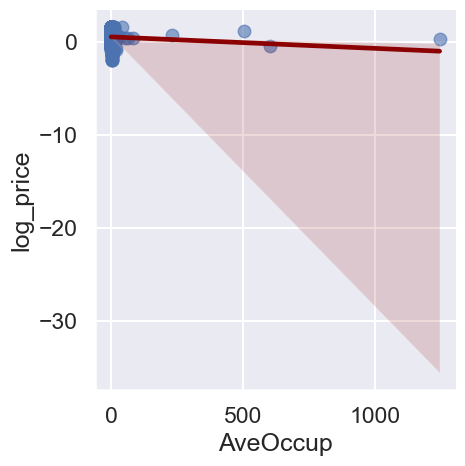

In [53]:
transformed_data = features
transformed_data['log_price'] = y_log
sns.lmplot(x='AveOccup', y='log_price', data=transformed_data, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Regression using log price

In [55]:
prices = np.log(df['price']) # using log prices
features = df.drop('price', axis = 1)
x_train,x_test,y_train,y_test = train_test_split(features, prices, test_size=0.2, random_state= 10 )

# %training set
len(x_train)/len(features)

model = LinearRegression()
model.fit(x_train,y_train)
print('Intercept', model.intercept_)


print('Training_R-squared', model.score(x_train, y_train))
print('Testing_R-Squared', model.score(x_test, y_test))

Intercept -24.570490460846436
Training_R-squared 0.6168233836099826
Testing_R-Squared 0.6037489256704888


In [56]:
pd.DataFrame(data= model.coef_, index = x_train.columns, columns = ['coef'])

,coef
MedInc,0.186068
HouseAge,0.002279
AveRooms,-0.030865
AveBedrms,0.224873
Population,0.000008
AveOccup,-0.002259
Latitude,-0.289071
Longitude,-0.289146


In [57]:
np.e**0.224873

1.252163681305837

In [58]:
model.coef_

array([ 1.86068427e-01,  2.27878842e-03, -3.08645298e-02,  2.24872545e-01,
        8.20099268e-06, -2.25898457e-03, -2.89070967e-01, -2.89145719e-01])

In [59]:
model.intercept_

-24.570490460846436

# p Values and Evaluating Coefficients

In [60]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
results.params

const        -24.570490
MedInc         0.186068
HouseAge       0.002279
AveRooms      -0.030865
AveBedrms      0.224873
Population     0.000008
AveOccup      -0.002259
Latitude      -0.289071
Longitude     -0.289146
dtype: float64

In [61]:
results.pvalues
pd.DataFrame({'coef': results.params, 'p-value': results.pvalues})

,coef,p-value
const,-24.570490,0.000000e+00
MedInc,0.186068,0.000000e+00
HouseAge,0.002279,4.850796e-21
AveRooms,-0.030865,1.092032e-22
AveBedrms,0.224873,2.039409e-50
Population,0.000008,1.421276e-03
AveOccup,-0.002259,1.361488e-07
Latitude,-0.289071,0.000000e+00
Longitude,-0.289146,0.000000e+00


In [62]:
results.pvalues

const         0.000000e+00
MedInc        0.000000e+00
HouseAge      4.850796e-21
AveRooms      1.092032e-22
AveBedrms     2.039409e-50
Population    1.421276e-03
AveOccup      1.361488e-07
Latitude      0.000000e+00
Longitude     0.000000e+00
dtype: float64

In [63]:
results.params

const        -24.570490
MedInc         0.186068
HouseAge       0.002279
AveRooms      -0.030865
AveBedrms      0.224873
Population     0.000008
AveOccup      -0.002259
Latitude      -0.289071
Longitude     -0.289146
dtype: float64

# Testing for Multicollinearity
$$ TAX  = \alpha _0 + \alpha _1RM + \alpha _2 NOX + ... + \alpha _{12}AveOccup $$
$$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^ 2)} $$

In [64]:
variance_inflation_factor(exog= x_incl_const.values, exog_idx = 1)

2.4741199441522217

In [65]:
x_incl_const.shape[1]

9

In [66]:
len(x_incl_const.columns)

9

In [67]:
vif = [] #empty list
for i in range(x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_incl_const.values, exog_idx=i))

In [68]:
vif

[17168.64639900052,
 2.4741199441522217,
 1.2407811031054883,
 8.87237661435907,
 7.538102860339473,
 1.1355969367025918,
 1.008730363827167,
 9.383400327454687,
 9.043759092819359]

In [69]:
vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=i) for i in range(x_incl_const.shape[1])] #empty list

pd.DataFrame({'coef_name': x_incl_const.columns,
             'vif': np.around(vif, 2)})    

,coef_name,vif
0,const,17168.65
1,MedInc,2.47
2,HouseAge,1.24
3,AveRooms,8.87
4,AveBedrms,7.54
5,Population,1.14
6,AveOccup,1.01
7,Latitude,9.38
8,Longitude,9.04


In [70]:
print(vif)

[17168.64639900052, 2.4741199441522217, 1.2407811031054883, 8.87237661435907, 7.538102860339473, 1.1355969367025918, 1.008730363827167, 9.383400327454687, 9.043759092819359]


In [71]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Model Simplification & the Bayesian information Criteria (BIC)

In [72]:
# Original model with log prices and all features
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()
results.params

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})
print('BIC is', results.bic)
print('r-squared', results.rsquared)

BIC is 12467.657146183048
r-squared 0.6168233836099826


In [100]:
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['AveOccup'], axis = 1)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()


reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared', results.rsquared)

BIC is 12560.03101700138
r-squared 0.6142202126337275


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [101]:
frames = [org_coef, reduced_coef]
pd.concat(frames, axis = 1)

,coef,p-value,coef,p-value
const,-24.640476,0.000,-2.547612e+01,0.000
MedInc,0.186017,0.000,1.837981e-01,0.000
HouseAge,0.002218,0.000,NaN,NaN
AveRooms,-0.031036,0.000,-3.217122e-02,0.000
AveBedrms,0.225684,0.000,2.282475e-01,0.000
Population,0.000007,0.006,-3.559228e-07,0.884
Latitude,-0.289761,0.000,-2.992670e-01,0.000
Longitude,-0.289910,0.000,-3.004501e-01,0.000


## Residuals & Residual Plots

In [ ]:
# Modified model: tranformed using log prices & simplified (dropping two prices)
features = df.drop(['price'], axis = 1)
prices = np.log(df['price','MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']) 

x_train,x_test,y_train,y_test = train_test_split(features, prices, test_size=0.2, random_state= 10 )

#Using Statsmodel
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

#Residuals
residuals = y_train - results.fittedvalues
residuals.describe()

#Graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 3)
plt.scatter(x = y_train, y = results.fittedvalues, color = 'navy', alpha = 0.6)
plt.plot(y_train , y_train , color='cyan')
plt.xlabel('Actual log prices $y _i$', fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize =17)

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.xlabel('Actual prices 00s $y _i$', fontsize = 14)
plt.ylabel('Predicted prices 000s $\hat y _i$', fontsize = 14)
plt.title(f'Actual vs predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize =17)
plt.show()

# Residual vs Predicted values

plt.scatter(x=results.fittedvalues, y = results.resid, c='navy', alpha = 0.6)
plt.xlabel('Predicted log prices $\hat y_i$, fontsize = 14')
plt.ylabel('Residuals vs Fitted values', fontsize = 17)
plt.show() 

# Residual Distribution chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.displot(results.resid, color='indigo')
plt.title(f'Residuals skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

#Mean squared error & rsquared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)


In [98]:
corr

0.784

In [97]:
pd.DataFrame({'R-Squared': [reduced_log_rsquared, full_normal_rsquared], 'MSE': [reduced_log_mse, full_normal_mse]}, index = ['Reduced Log Model', 'Omitted Var Model'])

,R-Squared,MSE
Reduced Log Model,0.615,0.125
Omitted Var Model,0.615,0.125
